<a href="https://colab.research.google.com/github/vishalrana00007/Global-Terrorism-Database-Capstone-Project/blob/main/Global_terrorism_analysis(Capstone_project)Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - GLOBAL TERRORISM DATABASE EDA PROJECT
##### **Contribution**    - Individual-: VISHAL RANA


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/vishalrana00007/Global-Terrorism-Database-Capstone-Project/tree/main

# **Problem Statement**


To uncover key insights and trends related to global terrorist activities, there is a need to explore and analyze the Global Terrorism Database (GTD), an open-source, comprehensive repository of information on terrorist attacks worldwide from 1970 to 2017. By utilizing the database, it is essential to identify and understand significant patterns, factors, and occurrences associated with terrorism. .

#### **Define Your Business Objective?**

The objective is to gain valuable insights that can assist in developing proactive counterterrorism strategies, facilitating international cooperation in combating terrorism, and enhancing public safety and security on a global scale

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
from warnings import filterwarnings as w
w('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.image as mpimg
import plotly.io as pio

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [3]:

file_location = '/content/drive/MyDrive/Copy of Global Terrorism Data.csv'
tr_df = tr_df = pd.read_csv(file_location, encoding = 'ISO-8859-1')


### Dataset First View

In [ ]:
# Dataset First Look
tr_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
tr_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = tr_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 181691
Number of columns: 135


Total Number of Rows = 181691

Total Number of Columns = 135

### Dataset Information

In [ ]:
# Dataset Info
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Here in this dataset: We have 181691 rows, 135 columns,datatype of 55 columns is float, 22 columns is integers and 58 columns is object type.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = tr_df.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = tr_df.isnull().sum()

print(missing_values_count)

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [ ]:
total_missing_values = missing_values_count.sum()
print("Total missing values:", total_missing_values)

Total missing values: 13853997


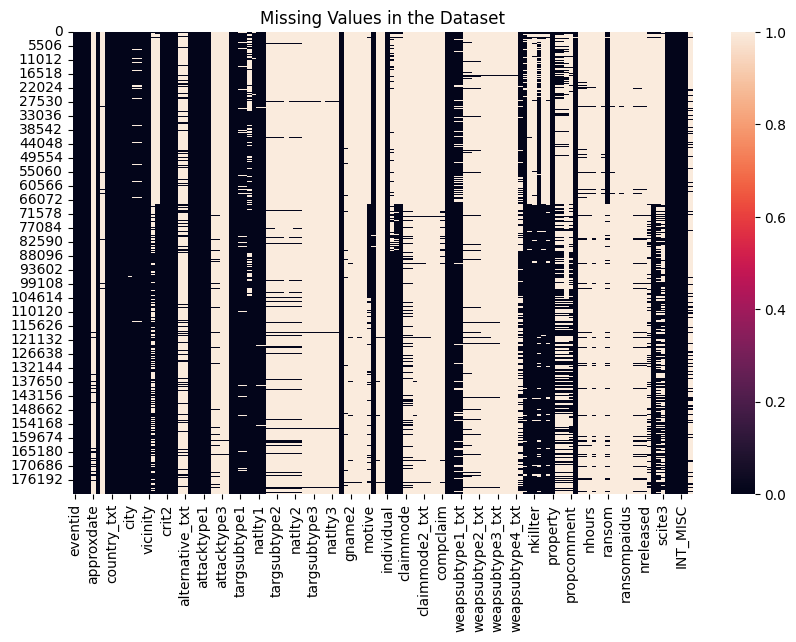

In [ ]:
# Visualizing the missing values
missing_values = tr_df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values)
plt.title("Missing Values in the Dataset")
plt.show()

### What did you know about your dataset?

As we can see from heatmap and above calculations, there are total 13853997 missing values in the dataset. This can have implications for data analysis as missing values can introduce bias and affect the accuracy of any conclusions drawn.The way forward for data analysis in this scenario would involve several steps, first it is important to identify reasons for missing values whether they are random or there is a pattern, next it is important to evaluate the impact of missing data.In dealing with missing values I have to choose between the options like removing rows and columns that are not significant for data analysis, or i have to use imputation techniques that can be used to fill in missing values with estimated or imputed values based on patterns in the existing data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
column_names = tr_df.columns.to_list()
for column_name in column_names:
    print(column_name)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [ ]:
# Dataset Describe
tr_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

### Variables Description

iyear =  This variable represents the year. It has a count of 181,691 data points. The mean (average) of the data is approximately 2002.64, indicating that the data tends to center around this value. The standard deviation (std) is approximately 13.26, which indicates the variability or spread of the data points around the mean. The minimum value is 1970, representing the earliest year in the dataset. The 25th percentile (25%) is 1991, which means that 25% of the data falls below this value. The 50th percentile (50%) or median is 2009, indicating that 50% of the data falls below this value. The 75th percentile (75%) is 2014, meaning that 75% of the data lies below this value. Finally, the maximum value is 2017, which represents the latest year in the dataset

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = {}
for column in tr_df.columns:
    unique_values[column] = tr_df[column].unique()

print(unique_values)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:
# Write your code to make your dataset analysis ready.
tr_df.rename(columns = {'iyear':'Year'}, inplace = True)
tr_df.rename(columns ={'imonth':'Month'},inplace = True)
tr_df.rename(columns = {'iday':'Day'}, inplace = True)
tr_df.rename(columns = {'country_txt':'Country'}, inplace = True)
tr_df.rename(columns = {'provstate':'state'}, inplace = True)
tr_df.rename(columns = {'region_txt':'Region'}, inplace = True)
tr_df.rename(columns = {'attacktype1_txt':'AttackType'}, inplace = True)
tr_df.rename(columns = {'target1':'Target'}, inplace = True)
tr_df.rename(columns = {'nkill':'Killed'}, inplace = True)
tr_df.rename(columns = {'nwound':'Wounded'}, inplace = True)
tr_df.rename(columns = {'summary':'Summary'}, inplace = True)
tr_df.rename(columns = {'gname':'Group'}, inplace = True)
tr_df.rename(columns = {'targtype1_txt':'Target_type'}, inplace = True)
tr_df.rename(columns = {'weaptype1_txt':'Weapon_type'}, inplace = True)
tr_df.rename(columns = {'motive':'Motive'}, inplace = True)
tr_df.rename(columns = {'success':'Success'}, inplace = True)
tr_df.rename(columns = {'suicide':'Suicide'}, inplace = True)

In [5]:
tr_df = tr_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Success','Suicide']]

In [ ]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
 18  Success      181691 non-

In [ ]:
tr_df = tr_df.drop_duplicates()

In [ ]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172232 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         172232 non-null  int64  
 1   Month        172232 non-null  int64  
 2   Day          172232 non-null  int64  
 3   Country      172232 non-null  object 
 4   state        171811 non-null  object 
 5   Region       172232 non-null  object 
 6   city         171798 non-null  object 
 7   latitude     168220 non-null  float64
 8   longitude    168219 non-null  float64
 9   AttackType   172232 non-null  object 
 10  Killed       162798 non-null  float64
 11  Wounded      156964 non-null  float64
 12  Target       171687 non-null  object 
 13  Summary      113108 non-null  object 
 14  Group        172232 non-null  object 
 15  Target_type  172232 non-null  object 
 16  Weapon_type  172232 non-null  object 
 17  Motive       49910 non-null   object 
 18  Success      172232 non-

In [ ]:
tr_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4012
longitude        4013
AttackType          0
Killed           9434
Wounded         15268
Target            545
Summary         59124
Group               0
Target_type         0
Weapon_type         0
Motive         122322
Success             0
Suicide             0
dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

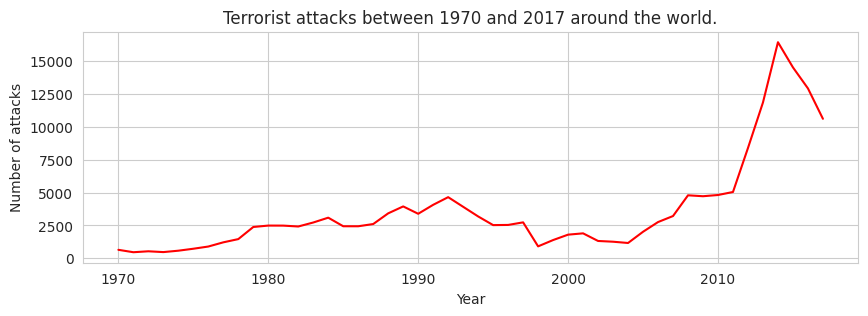

In [ ]:
# Chart - 1 visualization code

terrorist_attacks_by_years = tr_df['Year'].value_counts()

plt.figure(figsize=(10, 3))
sns.set_style("whitegrid")
sns.lineplot(x=terrorist_attacks_by_years.index, y=terrorist_attacks_by_years.values, color = 'red')
plt.title('Terrorist attacks between 1970 and 2017 around the world.')
plt.ylabel('Number of attacks')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used here is a line plot because it is an excellent tool for visualizing trends over time. In this case, it is used to depict the number of terrorist attacks over a range of years (from 1970 to 2017). It gives a clear picture of whether the incidents have increased, decreased, or remained stagnant over time.

##### 2. What is/are the insight(s) found from the chart?

**Initial Increase (1970s to mid-1990s)**: The upward trend in the number of terrorist attacks during this period might suggest a period of increasing political instability, cultural conflict, or rising global tensions.
***

**Decrease (mid-1990s to mid-2000s**): The decrease seen after the mid-1990s to mid-2000s can be indicative of effective counterterrorism policies, the end of certain conflicts, or variations in the international political climate.
***
**Substantial Increase (mid-2000s to around 2014-2015)**: The sharp increase again from the mid-2000s, peaking around 2014-2015, might be correlated with the political unrest in the Middle East (like the Arab Spring) or the rise of extremist groups like ISIL during this period.
***
**Declining Trend (2015-2017)**: After reaching the peak, the subsequent decline in terrorist activities might suggest that international and national measures to counter terrorism are proving effective. There could also have been key political or social changes leading to a reduction in conflicts that were previously causing terrorism

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Terrorist activities can have profound and lasting effects on a country's economy.Chronic terrorism can reduce economic growth by destroying infrastructure, disrupting commerce, causing public panic, and diverting public and private resources to security expenditures.

 Terrorism creates instability, an environment that investors generally tend to avoid. Reduced foreign direct investment (FDI) and even domestic investment can lead to slowing down the economy, as investments are typically directly tied to jobs and productivity enhancements.

 Terrorist activities can cause a sharp decline in tourism as travelers avoid the affected regions due to safety concerns, leading to substantial economic losses.With the increase in risk, insurance companies may also increase their premiums, especially for travel and business operations in affected areas. This can increase the cost of doing business and suppress economic activities

#### Chart - 2

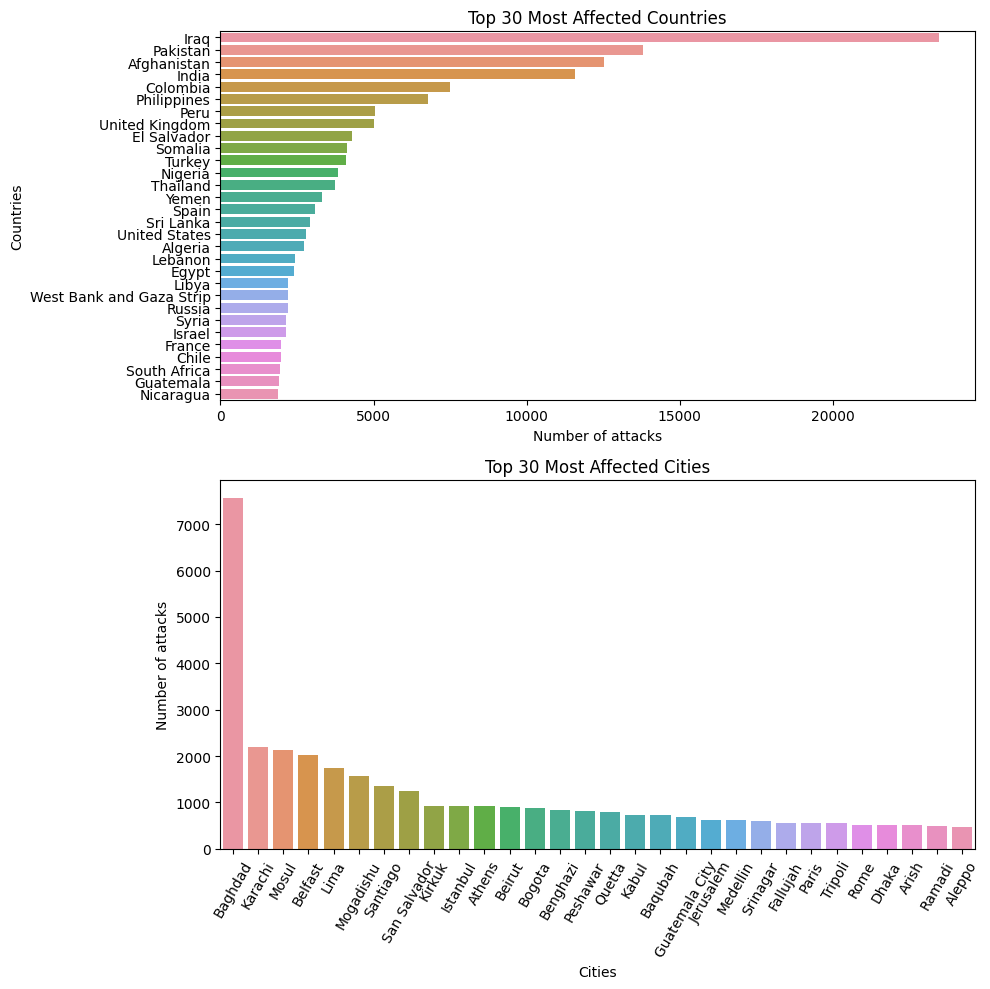

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)


most_affected_country = tr_df['Country'].value_counts().head(30)


sns.barplot(x=most_affected_country.values, y=most_affected_country.index)
plt.title('Top 30 Most Affected Countries')
plt.xlabel('Number of attacks')
plt.ylabel('Countries')


plt.subplot(2, 1, 2)


most_affected_cities = tr_df['city'].value_counts().iloc[1:31]


sns.barplot(x=most_affected_cities.index, y=most_affected_cities.values)
plt.xticks(rotation = 60)
plt.title('Top 30 Most Affected Cities')
plt.ylabel('Number of attacks')
plt.xlabel('Cities')


plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The specific charts used here are horizontal and vertical bar charts because both the country and city data are categorical variables and bar charts are ideal for comparing the number of observations (in this case, number of attacks) across different categories.

Bar charts with sorted data, as presented here, can also be used to showcase a ranking order (30 most affected countries and cities) effectively.

##### 2. What is/are the insight(s) found from the chart?

Based on the above charts, it seems terrorism disproportionately affects developing countries and cities.

Developing countries seem to bear a significant brunt of terrorism globally, with around 25 of the 30 countries most affected by terrorism being categorized as developing economies.

There could be several reasons for this like political instability as frequent power struggles, coup attempts, and clashes between rival political factions can create a volatile environment that allows terrorist groups to thrive.

Poverty, unemployment, and poor education systems are widespread in many developing countries. Such conditions can create a breeding ground for radicalisation and recruitment by extremist groups.

Developing economies often lack the capacity (financial and logistical) to sustain a strong, comprehensive security mechanism to fight against terrorism.

The trend is similar when we narrow down the focus to cities. Most of the cities that are most affected by terrorism are located in Asia,Africa, Middle East and Latin America.Belfast,Athens,Paris and Rome are the cities in the chart that are from advanced economies.

Conflict and civil unrest,geographical location,historical context etc. are some of the reasons in cities that leads to terrorism activities.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Terrorism delivers enduring impacts on nations and cities, dramatically etching its consequences into the cultural and societal fabric. These destructive acts nurture a pervasive sense of distrust among diverse communities, disrupting the harmonious societal landscape. With economic activities crippled, prosperity ebbs away, shrouding the vigorous economic scene with gloom. Additionally, research and development—a key driver of advancements—too grapples with terrorism's residual effects. In essence, terrorism strikes at the heart of a society's ethos, challenges trust, hampers economic growth, and imperils advancement, leaving a city or country battling for revival.

#### Chart - 3

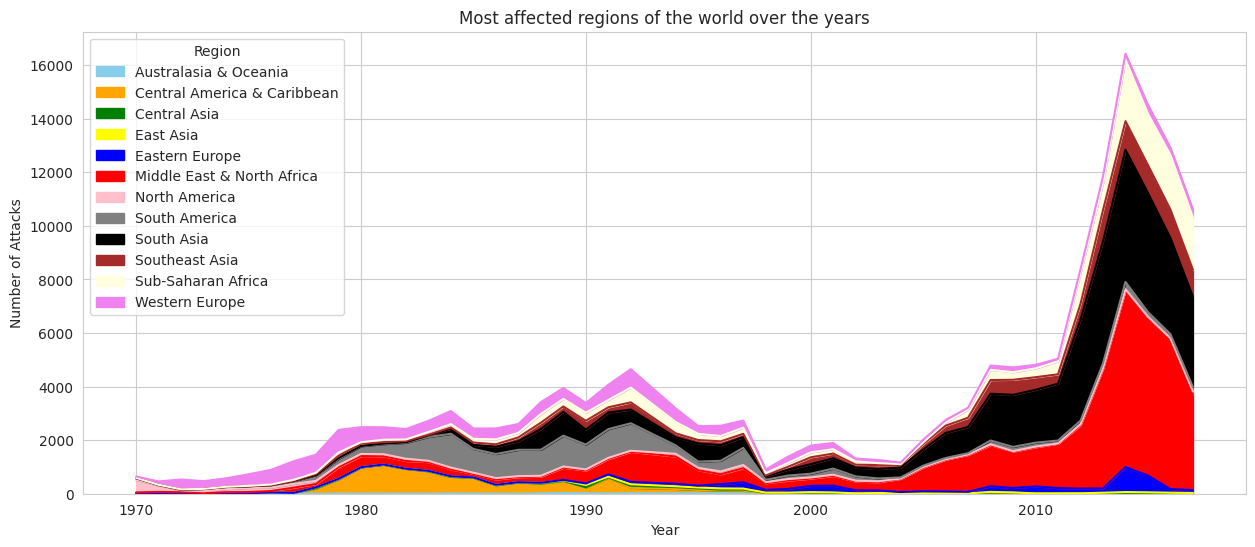

In [ ]:
# Chart - 3 visualization code
pd.crosstab(tr_df.Year, tr_df.Region).plot(kind='area',figsize=(15,6), color = ['skyblue','orange','green','yellow','blue','red','pink','grey','black','brown','lightyellow','violet','hotpink'])
plt.title('Most affected regions of the world over the years')
plt.ylabel('Number of Attacks')
ax = plt.gca()
ax.set_facecolor('white')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen plot is an Area chart, which visualizes the evolution of numerical values for several categories over time.Here it is representing changes in the number of terrorist attacks in different regions across the years.Area charts are best for showing trends rather than individual values, it allows viewers to compare number of attacks in different regions at a glance, moreover it signifies the volume (number of attacks) very well as regions with higher attacks will have larger areas.

##### 2. What is/are the insight(s) found from the chart?

**1970-1980** : Highest number of terrorists attacks can be seen in Western Europe.

**1980-1990**: Significant rise in terrorism activities in Latin America.During late 1980s South Asia also see an increase in terrorism activities.

**1990-2000**:Tiil mid 1990s Latin America remains most violent region, with significant attacks also happening in South Asia, Middle East and Western Europe.By late 1990s, Terrorism activities saw a decreasing trend in almost all the regions around the world.

**2000-2010**:During early phase of 2000s terrorism activities are an all time low in almost all the regions of the world.But during second half of 2000,significant rise can be seen in South Asia and MiddleEast and North Africa regions.South East Asia also see an upward trend.

**2010-2017**:Terrorism Activities are an all time high around 2014-2015 with chilling peak in the regions like MiddleEast and North Africa and South Asia seeing a sharp increase.Other regions like Sub Saharan Africa and Eastern Europe also see an increase. After 2015, gradual decline in terrorism activities can be seen around the world except in South East Asia , where there is a slight increase in terrorists attacks.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights derived from this trend analysis can greatly inform strategies of businesses seeking to operate or invest globally. Regions with decreasing trends may be attractive for business expansion, contributing to positive business impact.On the flip side, a surge in terrorism in a region could incur negative business consequences, stifling growth.                           
For instance, the steep rise in South Asia and Middle East and North Africa regions during 2010-2017 may reduce investors confidence. This could lead to reduced foreign investments, threatening business sustainability and expansion, thereby stoking negative economic growth.

#### Chart - 4

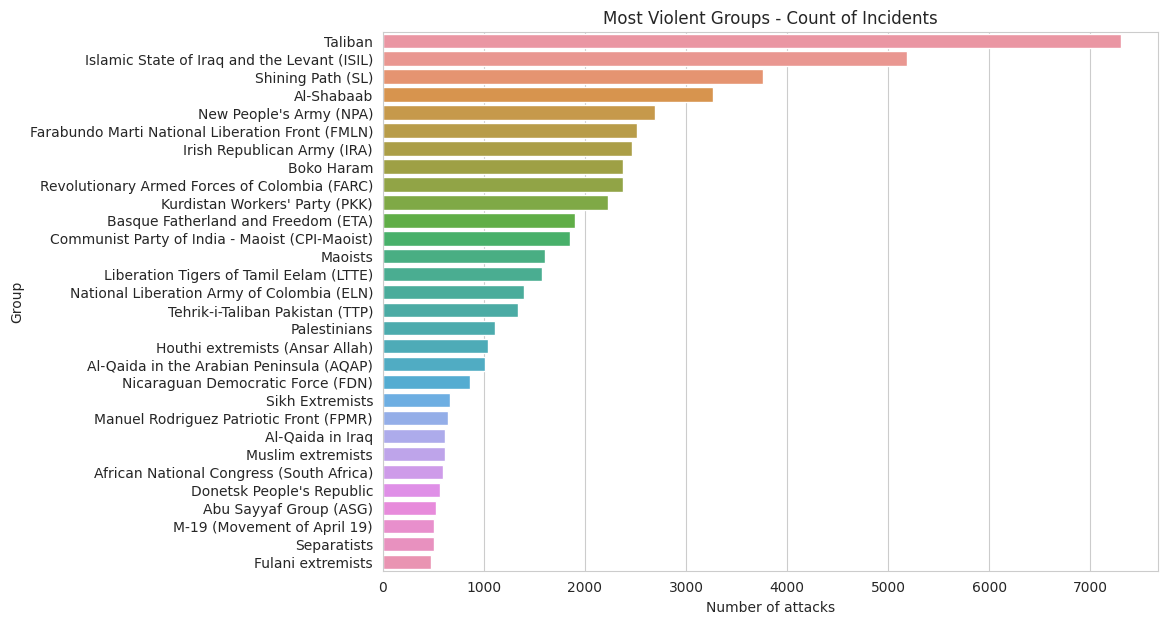

In [ ]:
# Chart - 4 visualization code
most_violent_30_groups = tr_df['Group'].value_counts().iloc[1:31]

plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.barplot(x=most_violent_30_groups.values, y=most_violent_30_groups.index)
plt.title('Most Violent Groups - Count of Incidents')
plt.ylabel('Group')
plt.xlabel('Number of attacks')
plt.show()



##### 1. Why did you pick the specific chart?

Here the selected plot,Horizontal Bar Chart, is an effective choice because bar charts are particularly good at representing discrete data categories like 'Group' names. It easily allows comparing the quantity (Number of attacks) across different categories(Group) while ensuring visual effectiveness.

##### 2. What is/are the insight(s) found from the chart?

**Biggest threats**:  Certain groups, such as the Taliban and Islamic State of Iraq and the Levant (ISIL), have been involved in an extremely high number of attacks, pointing towards their significant influence and operational capacity.

**Geography**: The groups span across wide range of territories, exemplifying the global nature of terrorist activities. They are not confined to a particular region or country.

**Ideologies**: Behind these groups lies a multitude of ideologies and conflict reasons, including religious beliefs, political ideologies, separatism, and resistance against state authority.

**Persisting Threats**: Some older groups, like the Irish Republican Army (IRA), represent persisting threats, despite several years of counter-terrorism efforts.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding which terrorist groups are most active can certainly impact economic growth of the region.High-activity extremist groups operating in regions crucial for a business's expansion or supply chain, could lead to negative growth.                                                       
For instance, a business with a significant presence in regions where the Taliban or ISIL are active might face increased operational challenges, security costs, and market instability, impacting business growth negatively.

#### Chart - 5

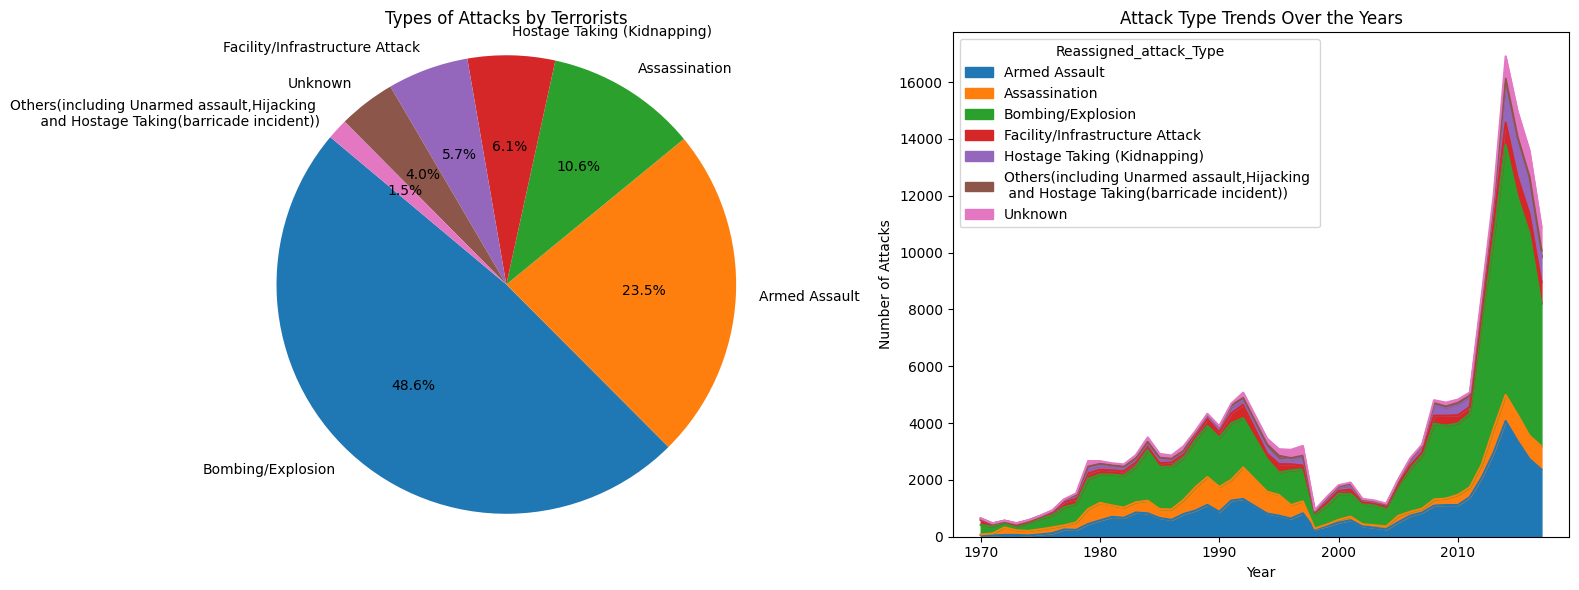

In [ ]:
# Chart - 5 visualization code
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

reassign_values = {"Unarmed Assault", "Hostage Taking (Barricade Incident)", "Hijacking"}

tr_df['Reassigned_attack_Type'] = tr_df['AttackType'].apply(lambda x: "Others(including Unarmed assault,Hijacking \n and Hostage Taking(barricade incident))" if x in reassign_values else x)

attack_types = tr_df['Reassigned_attack_Type'].value_counts()
axes[0].pie(attack_types, labels=attack_types.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Types of Attacks by Terrorists')
axes[0].axis('equal')

attack_type_trends = tr_df.groupby(['Year', 'Reassigned_attack_Type']).size().unstack(fill_value=0)
attack_type_trends.plot(ax=axes[1], kind='area', stacked=True)
axes[1].set_title('Attack Type Trends Over the Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Attacks')

plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

Here I have used two types of charts: Pie chart and Area chart.

Pie chart: It is a good choice to represent each category (attack type) as a percentage of the total. This helps display the relative frequency of each type of terrorist attack. It allows a quick overview of how various categories contribute to the whole in terms of their proportionate share in an easy-to-understand manner.

Area chart: An area chart is suitable for visualizing the distribution and progression of numerical values (number of attacks) over an interval (years). The plot essentially reflects how the frequency of different types of terrorist attacks changes over the years.

Both charts complement each other—the pie chart breaks down the overall composition of attack types, while the area chart presents how these proportions evolve over time, providing us with a comprehensive understanding of the data subject to analysis.

##### 2. What is/are the insight(s) found from the chart?

A significant proportion of terrorist attacks, the majority in fact, involve bomb explosions, showcasing the prevalence of this brutal modality. Next come armed assaults and assassinations, underlining the violent, direct confrontation often chosen to strike fear and chaos.Hostage-taking, albeit less frequent, are used to achieve political or ideological ends. Attacks on infrastructure reflect a strategic approach aimed not only at immediate damage but also at inflicting long-term societal disruption.

Over the years bombing/explosion,armed assault and assassination are the most common mechanisms employed by the terrorists to achieve their objectives.Hostage taking is also on an increasing trend in the 21st Century.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the economic growth of a country, physical assets play a critical role (e.g., real estate, retail, transport, manufacturing), knowing that bombings and attacks on infrastructure are common can lead to increased security costs or make some locations unattractively high risk, potentially curtailing economic growth.In extreme cases, a high threat risk can result in reduced business activity or divestment, leading to negative growth.Thus, these insights are essential in informing both growth opportunities and potential hurdles.

#### Chart - 6

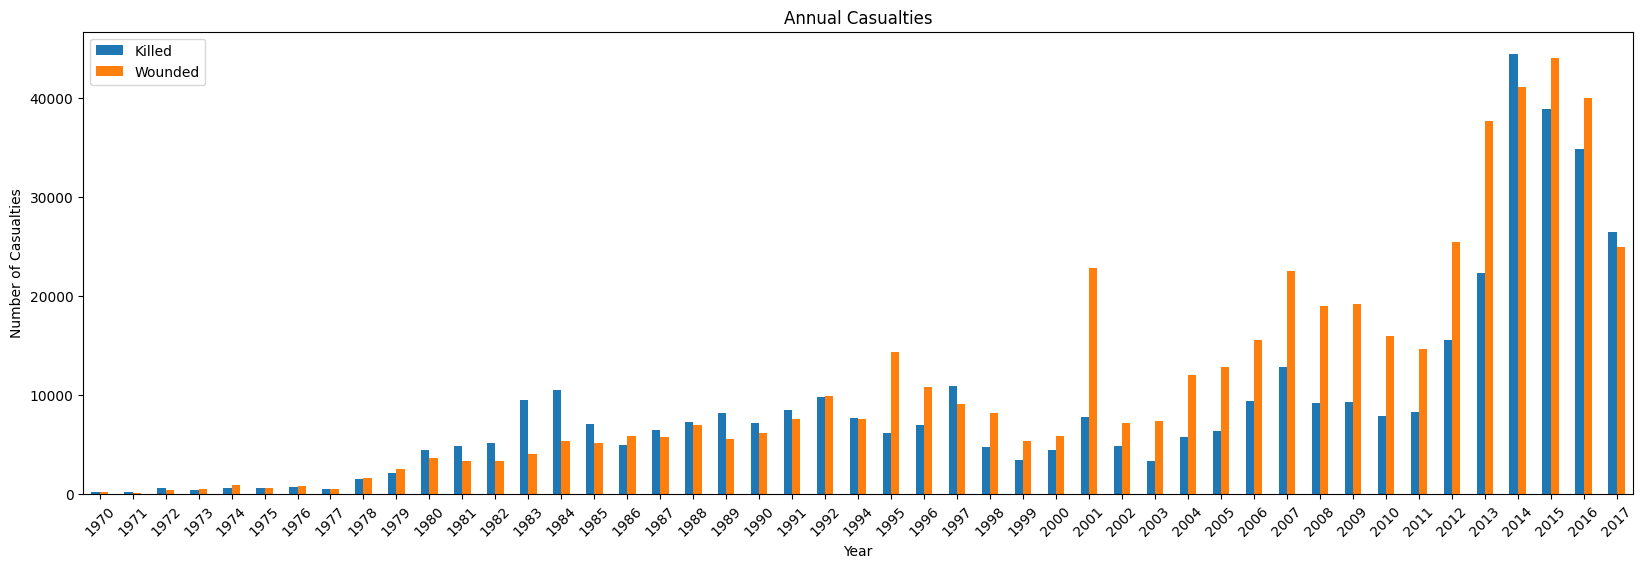

In [ ]:
# Chart - 6 visualization code
dims = ['Killed','Wounded']
killed_wounded = tr_df.groupby('Year')[dims].sum()

killed_wounded.plot(kind='bar', rot=45 ,figsize = (20,6))

plt.title('Annual Casualties')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.grid(False)

plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is stacked bar chart because itvisually distinguishes the annual count of different casualty types ('Killed' and 'Wounded'). The vertical bars allow for easy year-wise comparison of these measure.The chart's height signifies the total annual casualties, emphasizing the overall volume of casualties each year.The color distinction between 'Killed' and 'Wounded' helps differentiate the two categories clearly, providing an intuitive understanding of their relation to each other annually.

##### 2. What is/are the insight(s) found from the chart?

**Rising casualties**: Over the years, both fatalities('Killed) and injuries('Wounded') seem to have increased, pointing towards an escalating scale and intensity of terrorists activities.

**Significant years**: There are certain years when casualties saw a stark rise, e.g., in 2001, 2014, and 2015. These spikes may reflect landmark events—like the 9/11 attacks or escalating conflict in the Middle East—that trigger intense violence.

**Injured vs Fatalities**: More often than not, count of wounded are higher than killed.This underlines the distressing reality that many victims of terrorist attacks bear long-term physical and psychological scars, even if they survive.

**Flunctuating trends**: The number of casualties fluctuates over the years, suggesting that certain factors like geopolitical changes, counter-terrorism efforts and evolution of terrorist strategies significantly influence these figures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowledge of annual terrorism casualties in a country can impact business activities there, as companies try to make informed risk management decisions. Safeguarding employees and physical assets is paramount, and understanding fluctuating casualty trends helps tailor safety measures, insurance coverage, and crisis management plans accordingly.

Moreover, sectors that are dependent heavily on public participation, like tourism, entertainment, and retail, a high casualty risk can deter patrons and reduce demand, negatively affecting growth.

#### Chart - 7

In [ ]:
nltk.download('punkt')

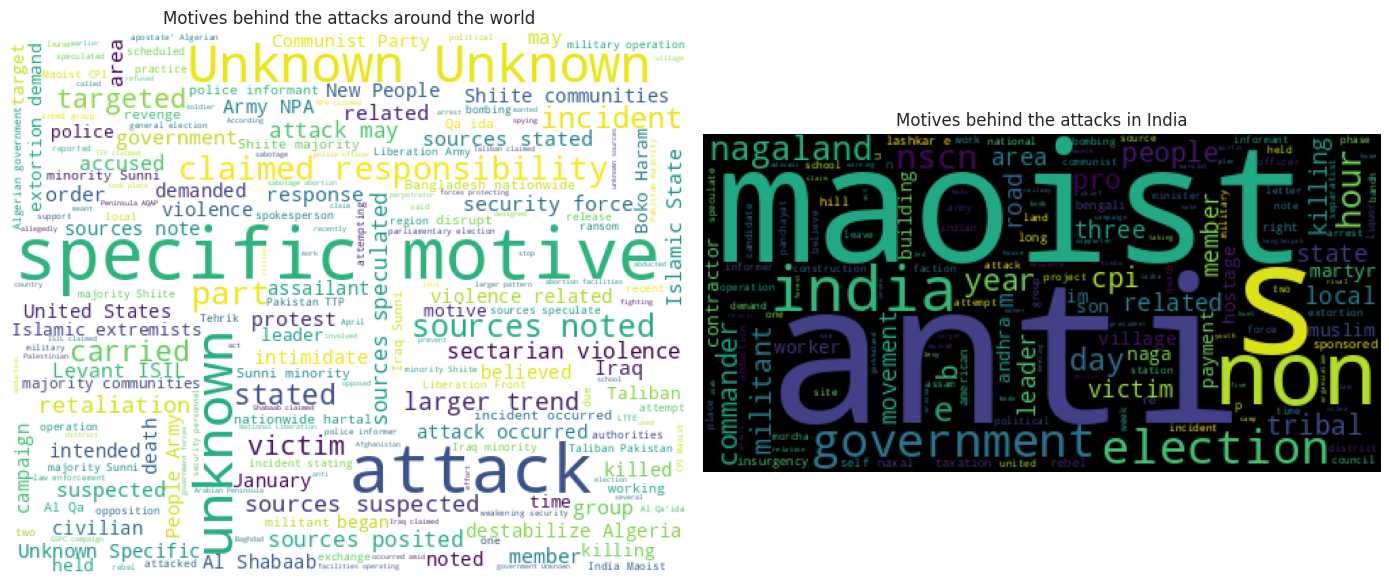

In [ ]:
# Chart - 7 visualization code
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# First wordcloud for all motives
motive = tr_df.Motive.dropna(False)
wordcloud1 = WordCloud(background_color='white', width=500, height=400).generate(' '.join(motive))
axs[0].imshow(wordcloud1)
axs[0].axis('off')
axs[0].set_title('Motives behind the attacks around the world')

#Second wordcloud for Indian motives
df_country = tr_df[tr_df['Country'] == 'India']
country_motive = df_country['Motive'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(country_motive)
stopwords = set(STOPWORDS)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
wordcloud2 = WordCloud(stopwords=stopwords, background_color='black').generate(" ".join(words_except_stop_dist))
axs[1].imshow(wordcloud2)
axs[1].axis('off')
axs[1].set_title('Motives behind the attacks in India')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The charts selected here are word clouds. A word cloud is a collection or cluster of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned or the more important it is.

Word cloud provides an visually appealing way to represent textual data and large volumes of teext data.Here it is providing valuable insights about motives behind the attacks.

##### 2. What is/are the insight(s) found from the chart?

The first word cloud chart reflects general motives behind global terrorist attacks, despite many specific motives remaining undisclosed. It highlights prevalent causes such as sectarian violence, separatist movements, and Shia-Sunni conflicts. Other motives inferred include targeted and revenge killings encompassing socio-political power struggles. There is clear disdain against the United States, possibly indicating instances of anti-US extremism. There's also mention of actions against police informers and military operations.

The second word cloud focused on India demonstrates specific motives driving terrorist activities in the country. Most prominent among these are Maoist activities coupled with a defined anti-government stance. Another key motive observed is the intention to destabilize the Union Territory of Jammu and Kashmir, indicative of geopolitical conflict in this region. Separatist demands in Northeast India highlight the ethnic and regional tensions involved. The chart also suggests revenge for communal riots as a motive, revealing the deep-seated religious and communal tensions driving terrorism in parts of the country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the motives behind terrorist attacks, both on a global scale and specifically in India, is crucial for entities operating in risk management, policy making, diplomacy, security services, and international business.

#### Chart - 8

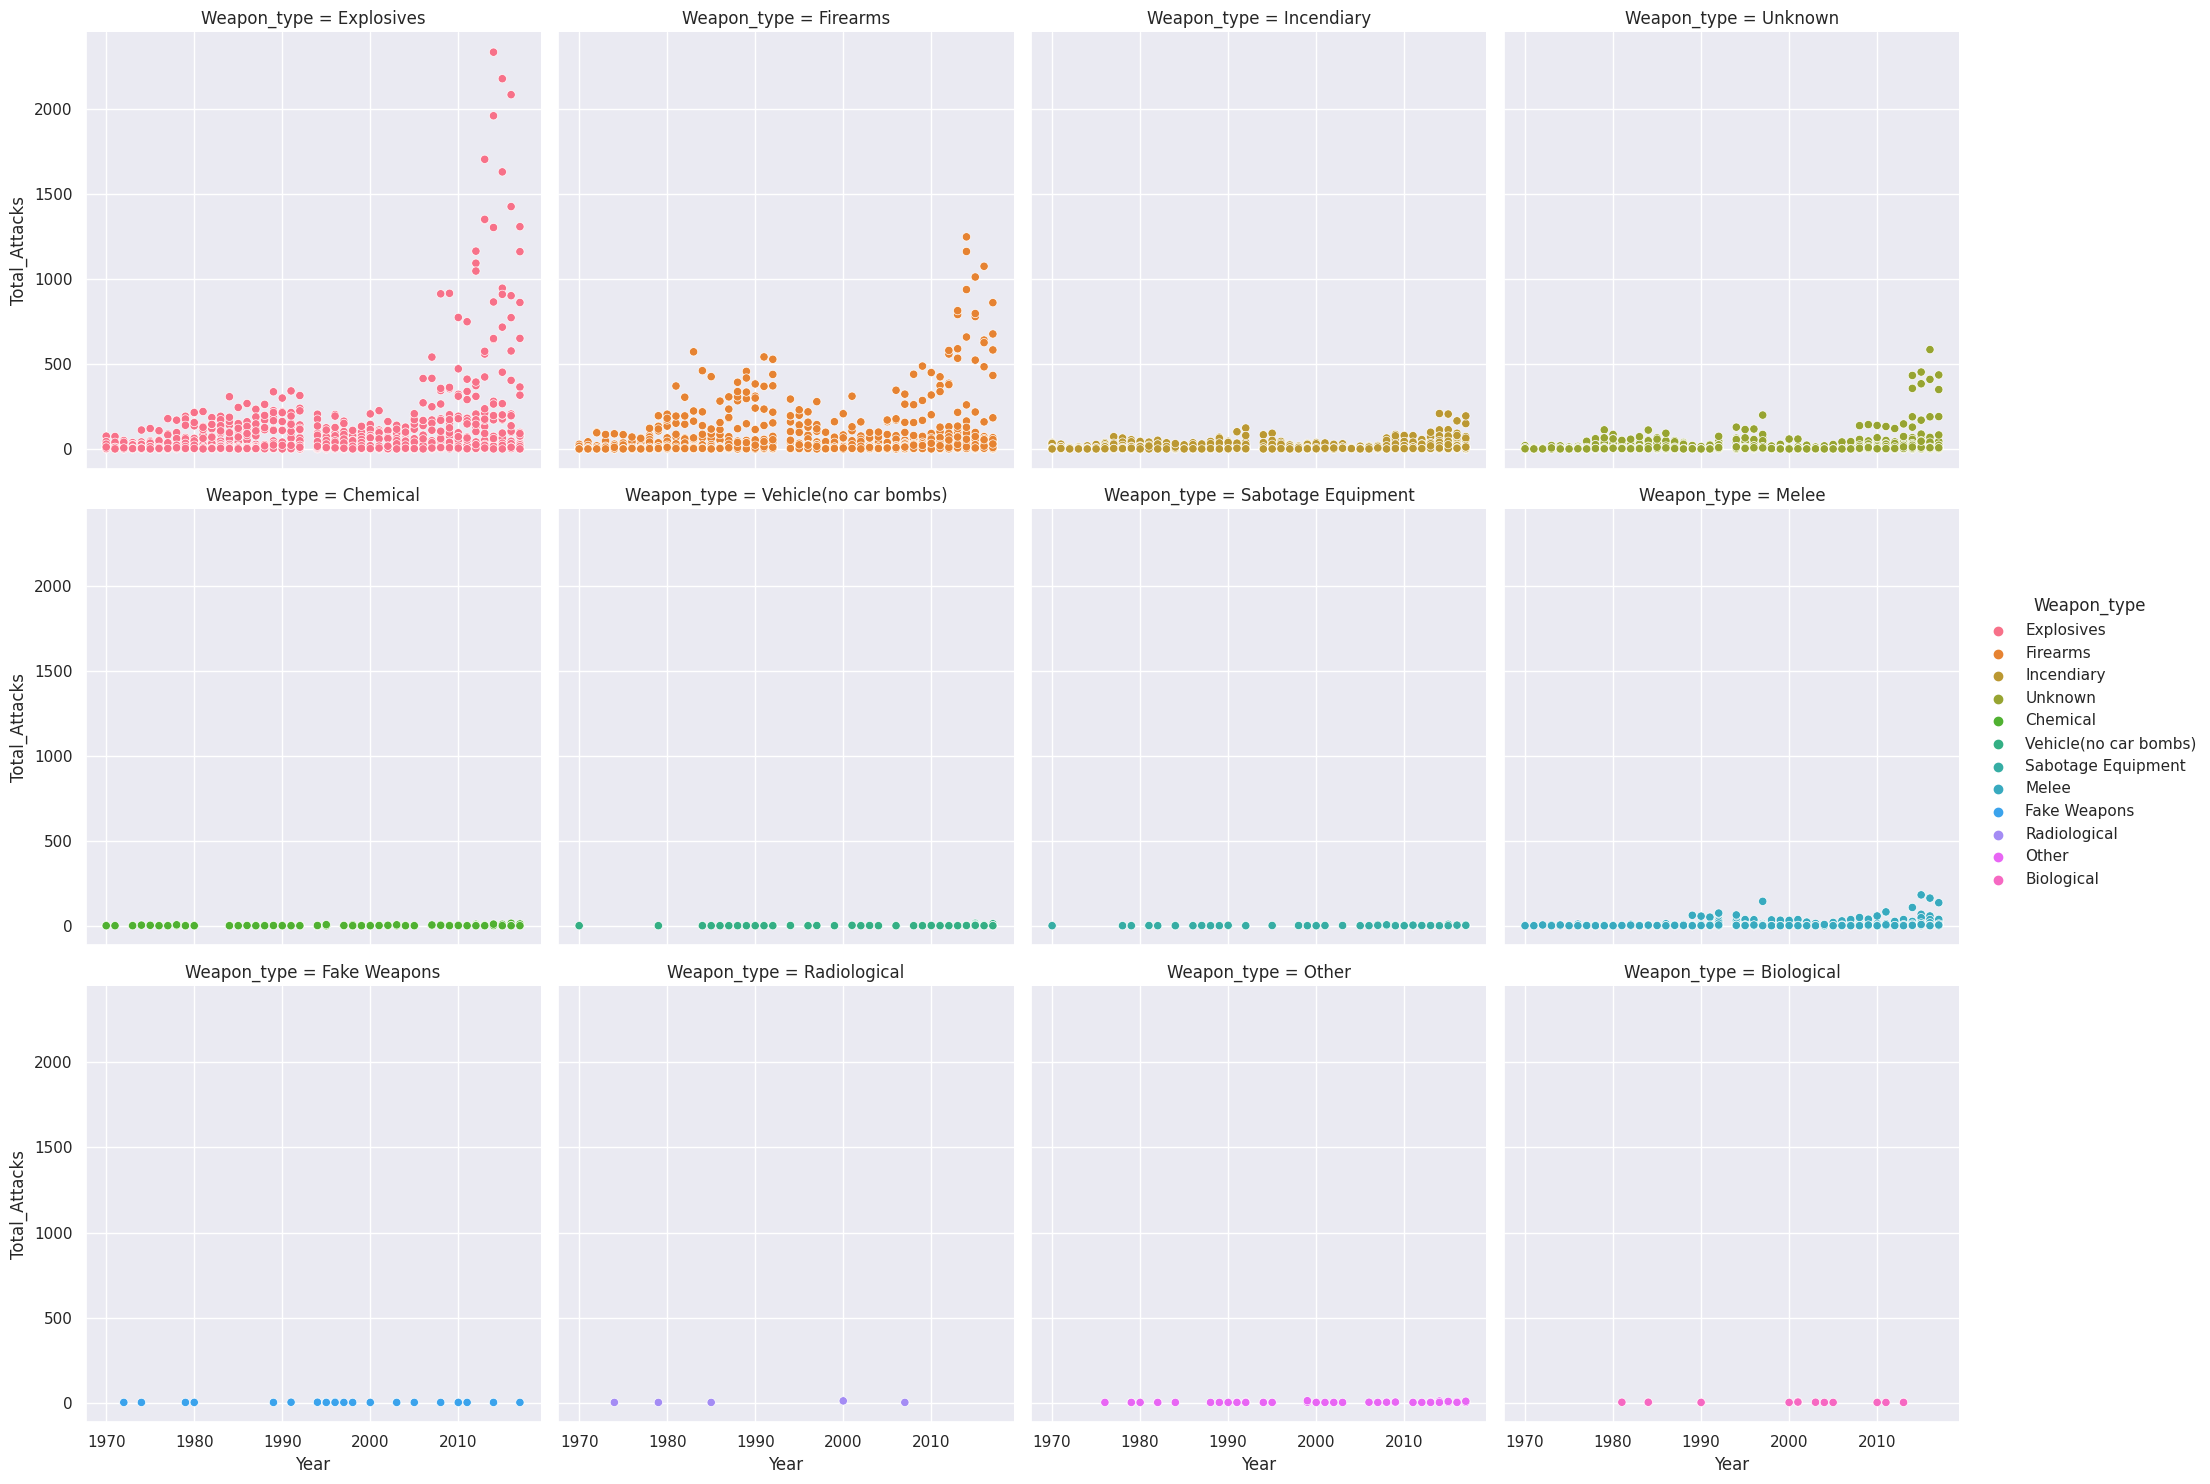

In [ ]:
# Chart - 8 visualization code
replace_values = {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)" : "Vehicle(no car bombs)"}

tr_df['Weapon_type'] = tr_df['Weapon_type'].replace(replace_values)

grouped_df = tr_df.groupby(['Year','Target_type','Weapon_type']).size().reset_index(name='Total_Attacks')

sns.set(style="darkgrid")
sns.relplot(data=grouped_df, col="Weapon_type", y="Total_Attacks", hue = 'Weapon_type',col_wrap=4, x='Year')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

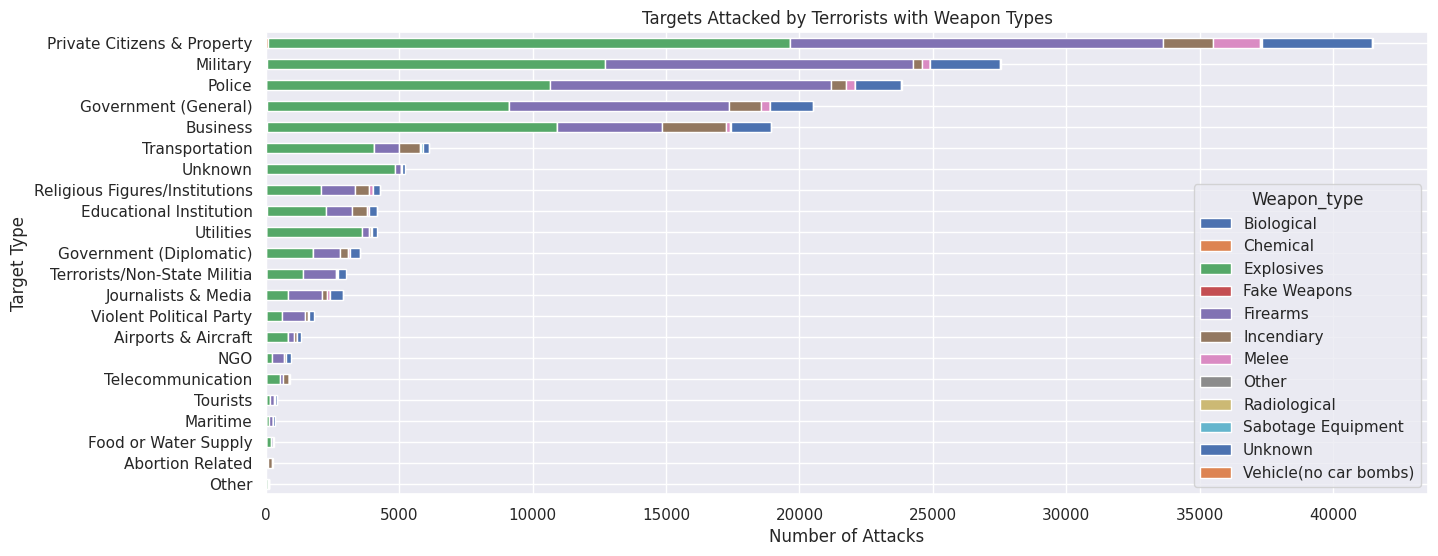

In [ ]:
# Chart - 9 visualization code
weapon_target_counts = pd.crosstab(tr_df['Target_type'], tr_df['Weapon_type'])


weapon_target_counts['total'] = weapon_target_counts.sum(axis=1)

weapon_target_counts = weapon_target_counts.sort_values('total', ascending=True).drop(columns='total')

weapon_target_counts.plot(kind='barh', stacked=True, figsize=(15, 6))

plt.title('Targets Attacked by Terrorists with Weapon Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

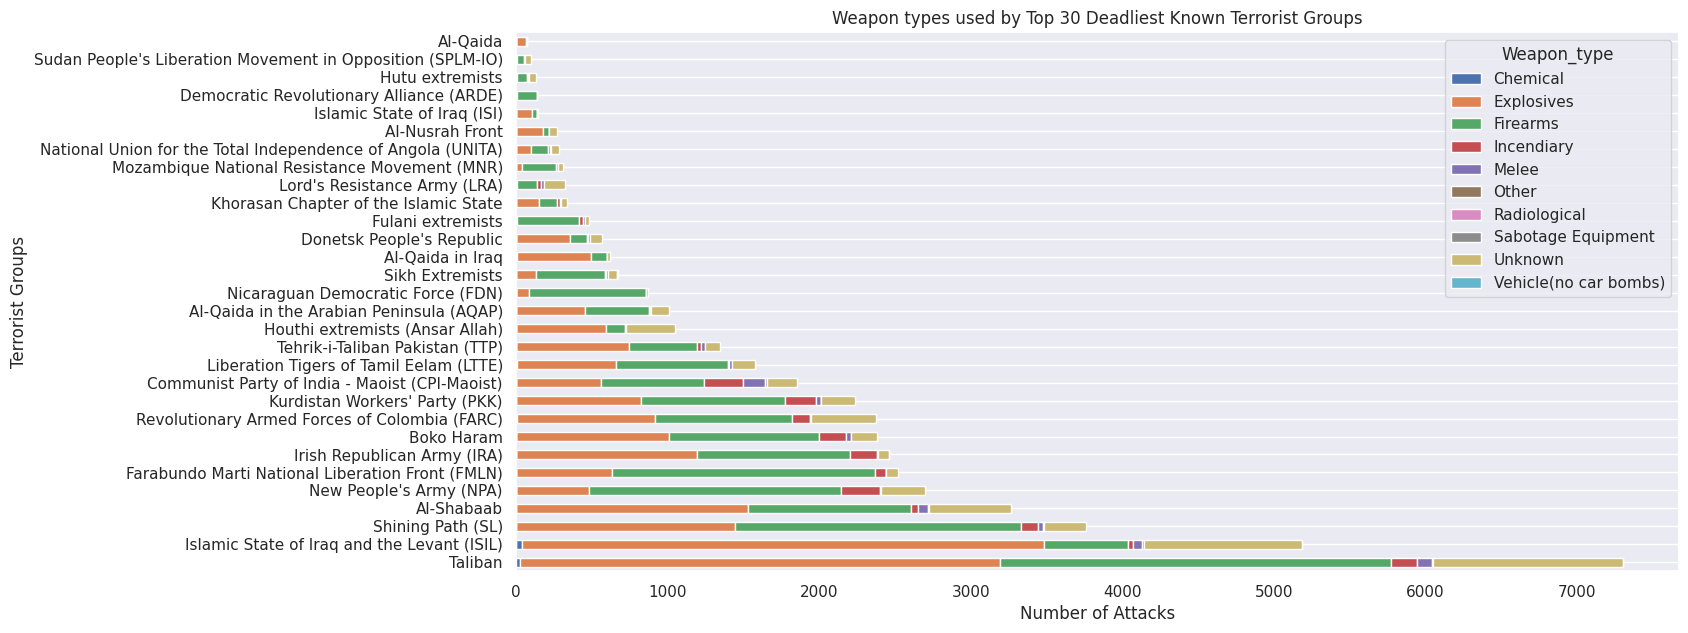

In [ ]:
# Chart - 10 visualization code

filtered_df = tr_df[tr_df['Group'] != 'Unknown']

top_groups = filtered_df.groupby("Group")["Killed"].sum().nlargest(30).index

top_groups_df = filtered_df[filtered_df["Group"].isin(top_groups)]

weapon_counts = pd.crosstab(top_groups_df['Group'], top_groups_df['Weapon_type'])

ordered_weapon_counts = weapon_counts.sum(axis=1).sort_values(ascending=False)
weapon_counts = weapon_counts.reindex(ordered_weapon_counts.index)

weapon_counts.plot(kind="barh", stacked=True, figsize=(15, 7))

plt.title('Weapon types used by Top 30 Deadliest Known Terrorist Groups')
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Groups')
plt.grid(axis='x')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

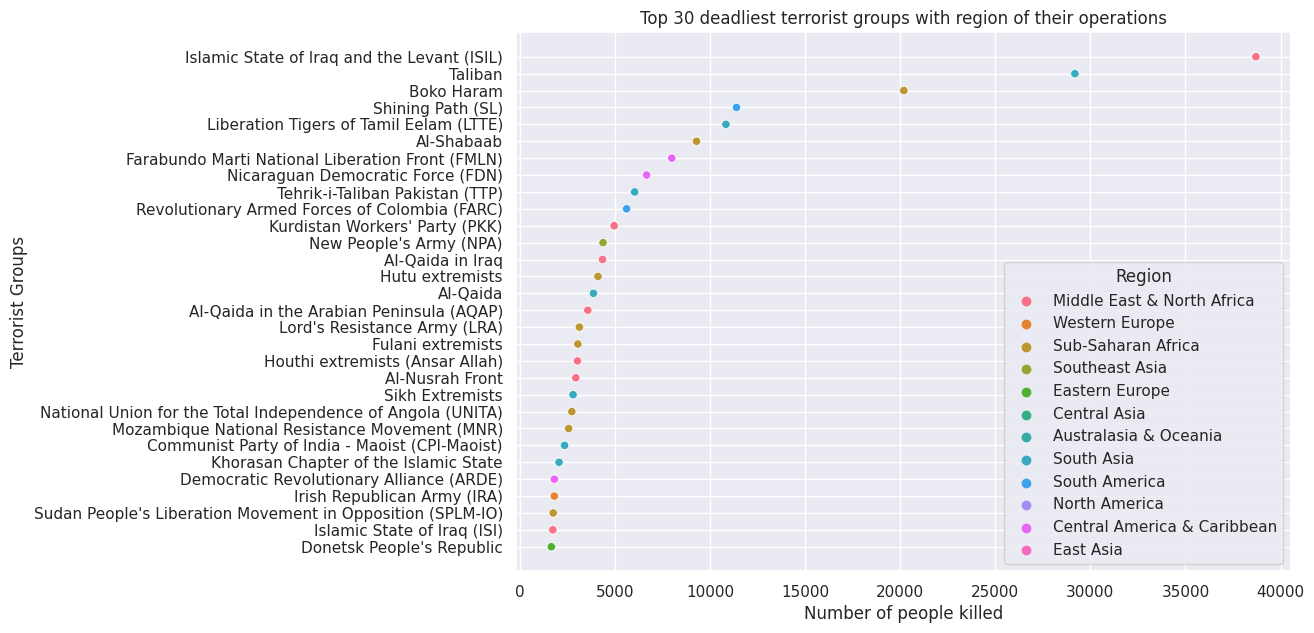

In [ ]:
# Chart - 11 visualization code
group_kills = tr_df[tr_df['Group'] != 'Unknown'].groupby('Group')['Killed'].sum()
group_kills = group_kills.sort_values(ascending=False).head(30)

group_kills = group_kills.reset_index()

group_kills = group_kills.merge(tr_df[['Group', 'Region']], on='Group')

plt.figure(figsize=(10, 7))

sns.scatterplot(data=group_kills, x='Killed', y='Group', hue='Region')

plt.title('Top 30 deadliest terrorist groups with region of their operations')
plt.ylabel('Terrorist Groups')
plt.xlabel('Number of people killed')
plt.grid(True)

plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
counts_df = tr_df['Country'].value_counts().reset_index()
counts_df.columns = ['Country', 'Counts']

# get the choropleth plot with plotly
fig1 = px.choropleth(counts_df, locations='Country',color='Counts',locationmode='country names',color_continuous_scale="Reds")
fig1.update_layout(title='Number of Terrorists attacks by Country between 1970 to 2017', geo_scope = 'world',width = 800, height = 400)
fig1.show()



In [ ]:
# Calculate number of failed attempts for each country
failed_attempts = tr_df[tr_df['Success'] == 0].groupby('Country')['Success'].count()

# Calculate number of successful attempts for each country
successful_attempts = tr_df[tr_df['Success'] == 1].groupby('Country')['Success'].count()

# Calculate total attempts for each country
total_attempts = failed_attempts.add(successful_attempts, fill_value=0)

# Filter countries where total_attempts are greater than 500
total_attempts = total_attempts[total_attempts > 500]
failed_attempts = failed_attempts[total_attempts.index]

# Calculate failure rate for each country
failure_rate = round(failed_attempts / total_attempts * 100,2)

In [ ]:
# Calculate number of failed attempts for each country
failed_attempts = tr_df[tr_df['Success'] == 0].groupby('Country')['Success'].count()

# Calculate number of successful attempts for each country
successful_attempts = tr_df[tr_df['Success'] == 1].groupby('Country')['Success'].count()

# Calculate total attempts for each country
total_attempts = successful_attempts.add(failed_attempts, fill_value=0)

# Filter countries where total_attempts are greater than 500
total_attempts = total_attempts[total_attempts > 500]
successful_attempts = successful_attempts[total_attempts.index]

# Calculate failure rate for each country
success_rate = round(successful_attempts / total_attempts * 100,2)

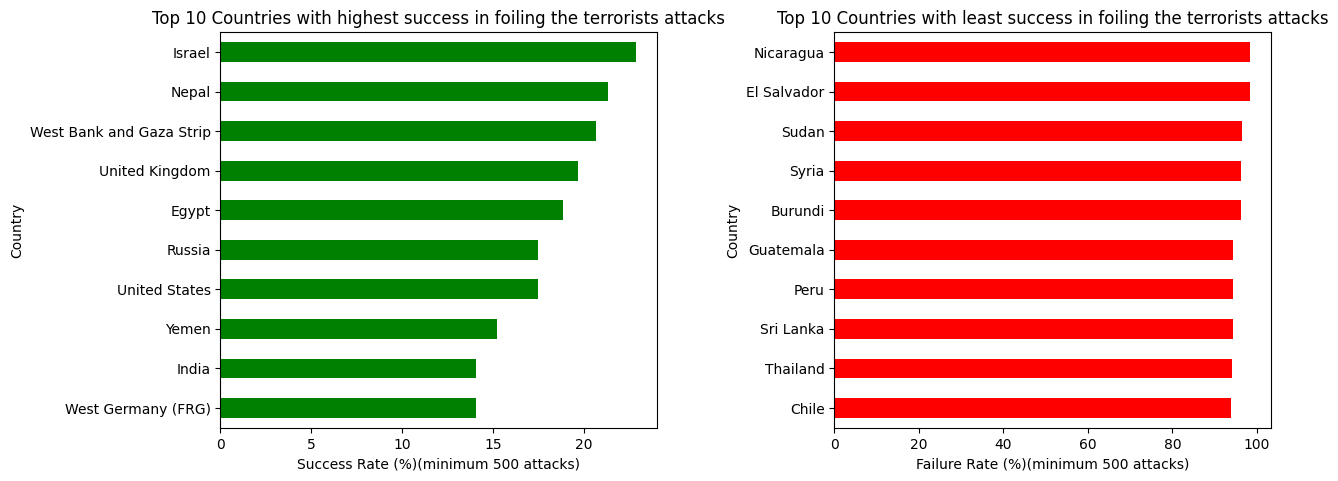

In [ ]:


top_10_countries_failure = failure_rate.sort_values(ascending=False).head(10)
top_10_countries_success = success_rate.sort_values(ascending=False).head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


top_10_countries_failure.plot(kind='barh', color='green', ax=axes[0])
axes[0].set(title='Top 10 Countries with highest success in foiling the terrorists attacks',
             xlabel='Success Rate (%)(minimum 500 attacks)', ylabel='Country')
axes[0].invert_yaxis()


top_10_countries_success.plot(kind='barh', color='red', ax=axes[1])
axes[1].set(title='Top 10 Countries with least success in foiling the terrorists attacks',
             xlabel='Failure Rate (%)(minimum 500 attacks)', ylabel='Country')
axes[1].invert_yaxis()

fig.tight_layout(pad=5.0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

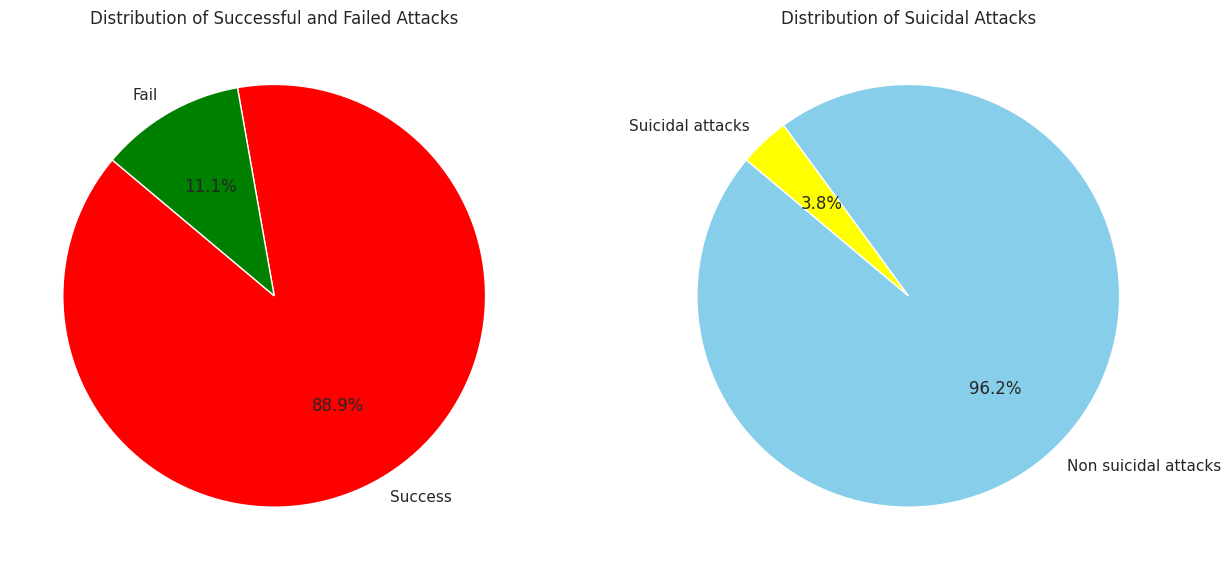

In [ ]:
# Chart - 13 visualization code


tr_df_copy_1 = tr_df.copy()
tr_df_copy_2 = tr_df.copy()


tr_df_copy_1['Success'] = tr_df_copy_1['Success'].replace({0: 'Fail', 1: 'Success'})


tr_df_copy_2['Suicide'] = tr_df_copy_2['Suicide'].replace({0: 'Non suicidal attacks', 1: 'Suicidal attacks'})


success_counts = tr_df_copy_1['Success'].value_counts()


suicide_counts = tr_df_copy_2['Suicide'].value_counts()


fig, axs = plt.subplots(1, 2, figsize=(15, 7))


axs[0].pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=140, colors = ['Red','Green'])
axs[0].set_title('Distribution of Successful and Failed Attacks')

axs[1].pie(suicide_counts, labels=suicide_counts.index, autopct='%1.1f%%', startangle=140, colors = ['skyblue','yellow'])
axs[1].set_title('Distribution of Suicidal Attacks')

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

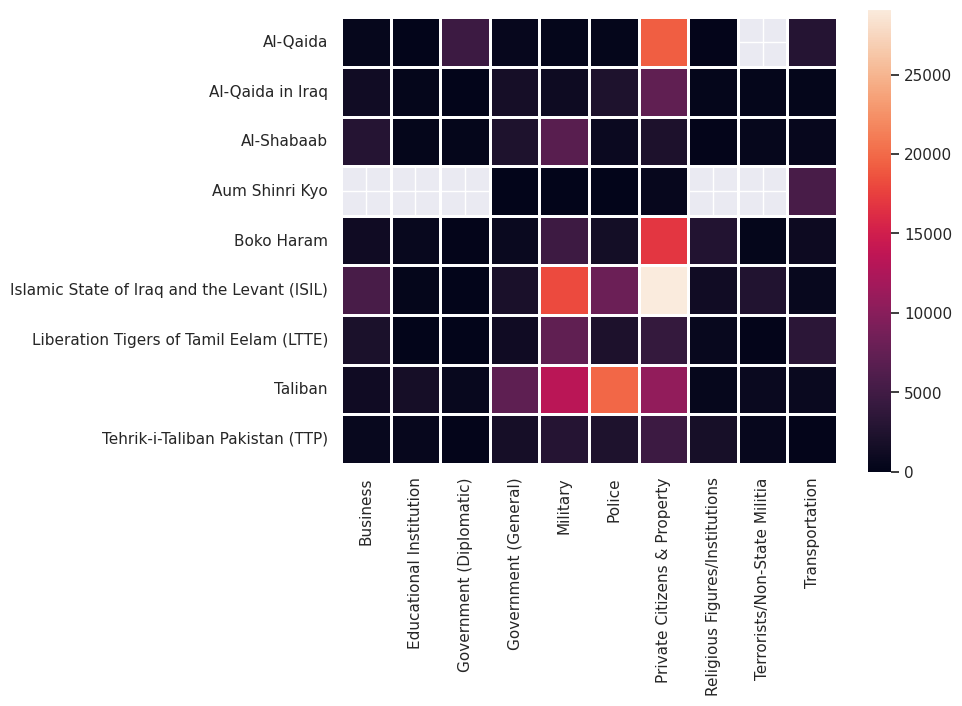

In [ ]:
# Correlation Heatmap visualization code
data = tr_df.groupby(["Group", "Target_type"])[['Killed', 'Wounded']].sum()
data = data.reset_index()
data = data[data.Target_type != 'Unknown']
data = data[data.Group != 'Unknown']
data = data[data.Group.isin(list(tr_df.groupby("Group").Wounded.sum().sort_values(ascending=False)[:10].index.tolist()))]
data = data[data.Target_type.isin(list(tr_df.groupby("Target_type").Wounded.sum().sort_values(ascending=False)[:10].index.tolist()))]


data = data.fillna(0)
data['Victim'] = data.Killed + data.Wounded
del data['Killed']
del data['Wounded']
sns.heatmap(data.pivot('Group', 'Target_type', 'Victim'),square=True, linewidths=1, linecolor='white')
plt.ylabel('')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(8,6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

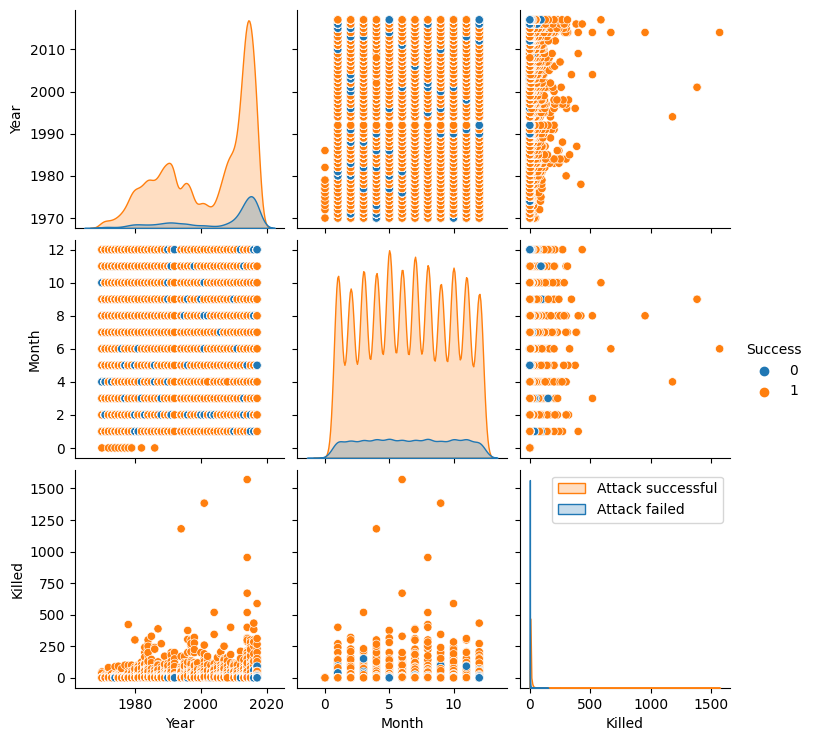

In [ ]:
# Pair Plot visualization code.
df = tr_df[['Year','Month','Killed','Success']]
sns.pairplot(df, hue = 'Success')
plt.legend(labels=['Attack successful', 'Attack failed '])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***